In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Project.toml`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Manifest.toml`
Precompiling project...
  ✓ Dragoon
  1 dependency successfully precompiled in 5 seconds. 225 already precompiled.


In [2]:
using Dragoon, Plots #, Dates

In [3]:
n = 20 # number of discs in the booster

initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(22.025e9,50e6; n=100) # optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster
booster.tand = 1e-5

hist = initHist(booster,10000,freqs,ObjRef1dTest());

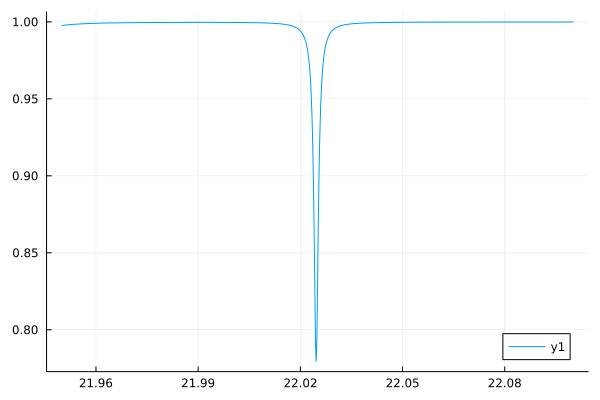

In [8]:
plot(freqsplot/1e9,abs.(getRef1d(booster,freqsplot)))

In [ ]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-9,
                    ObjRef1dSquare(ref1),
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e3),
                    showtrace=true,
                    showevery=100,
                    unstuckisiter=true)

In [ ]:
plot(freqsplot,getBoost1d(booster,freqsplot))

In [ ]:
plot(freqs,real(Dragoon.getRef1d(booster,freqs)))
plot!(freqs,imag(Dragoon.getRef1d(booster,freqs)))

In [ ]:
plot(freqs,real(ref1))
plot!(freqs,imag(ref1))

In [ ]:
scatter(pos2dist(booster.pos))

In [ ]:
analyse(hist,trace,freqsplot; freqs=freqs,div=20,scale=1e9,ylim=[-0.05e4,3e4])